In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

salaries_df=pd.read_csv("/content/Salary_Dataset_with_Extra_Features.csv")
salaries_df.sample(10)




,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
13462,4.3,Fresher Than Fresh,Software Development Engineer,600000,1,Mumbai,Full Time,SDE
2315,4.5,SwarajyaIT,Android Developer,336000,1,Pune,Full Time,Android
280,3.9,Ultimate tek Solutions,Android Developer,300000,1,Bangalore,Full Time,Android
9825,2.0,Lithium Urban Technologies,Senior Android Applications Developer,800000,1,Bangalore,Full Time,Android
22138,3.2,GeoTech Infoservices,Web Developer,400000,1,Bangalore,Full Time,Web
250,4.8,Fermedicius Labs,Android Developer,200000,1,Bangalore,Full Time,Android
17782,4.5,HackerRank,Software Development Engineer II,2100000,5,Bangalore,Full Time,SDE
4155,3.8,PointCross Life Sciences,Front End Developer,800000,1,Bangalore,Full Time,Frontend
2344,3.8,EXE IT,Android Developer,200000,1,Pune,Full Time,Android
15996,4.2,Startup,Software Development Engineer (SDE),1000000,1,Mumbai,Full Time,SDE


In [15]:
#checking the shape of the dataset
salaries_df.shape

(22770, 8)

In [16]:
#columns present in the dataset
salaries_df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')

In [17]:
#information about the dataset
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [18]:
salaries_df.describe()


,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [19]:
#checking for null values
salaries_df.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [20]:
#checking for duplicate values
salaries_df.duplicated().sum()

2

In [21]:
#unique values in job titles
salaries_df["Job Title"].unique()


array(['"ORACLE DBA"', '.NET Developer, Python', '.NET/Android Developer',
       'Ace - Android Developer', 'Advanced Database Administrator',
       'Advanced Python Developer', 'AEM Front End Developer ',
       'Amazon Software Development Engineer',
       'Amazon Software Development Engineer ',
       'Amazon Software Development Engineer I',
       'Amazon Software Development Engineer II',
       'Amazon Software Development Engineer In Test', 'Android',
       'Android ', 'Android & Flutter Developer ',
       'Android &amp; Flutter Developer', 'Android and Flutter Developer',
       'Android App Developer', 'Android App Developer ',
       'Android App Development', 'Android Applications Developer',
       'Android Applications Developer ',
       'Android Applications Develpoers', 'Android Architect',
       'Android Associate Trainee', 'Android Develoiper',
       'Android Developer', 'Android Developer/Software Engineer',
       'Android Framework Developer', 'Android Fra

In [22]:
salaries_df['Location'].value_counts()


Bangalore         8264
Hyderabad         4467
New Delhi         4176
Chennai           2458
Pune              2134
Mumbai             749
Kolkata            178
Madhya Pradesh     155
Kerala             108
Jaipur              81
Name: Location, dtype: int64

In [23]:
salaries_df['Job Title'].value_counts()


Software Development Engineer          2394
Android Developer                      2282
Front End Developer                    1639
Software Development Engineer (SDE)    1637
Test Engineer                          1389
                                       ... 
Mobile Phone Repair Technician            1
Mobile Platform Developer                 1
Mobile Service Manager                    1
Mobile Software Developer                 1
Xamarin Mobile Developer                  1
Name: Job Title, Length: 903, dtype: int64

In [24]:
salaries_df["Salaries Reported"].value_counts()[:5]


1    18206
2     2401
3      789
4      382
5      228
Name: Salaries Reported, dtype: int64

In [25]:
#calculating maximum, minimum, mean and meadian salary
print("Maximum Salary : ₹", round(salaries_df['Salary'].max()))
print("Minimum Salary : ₹", round(salaries_df['Salary'].min()))
print("Mean Salary : ₹", round(salaries_df['Salary'].mean()))
print("Average Salary : ₹", round(salaries_df['Salary'].median()))

Maximum Salary : ₹ 90000000
Minimum Salary : ₹ 2112
Mean Salary : ₹ 695387
Average Salary : ₹ 500000


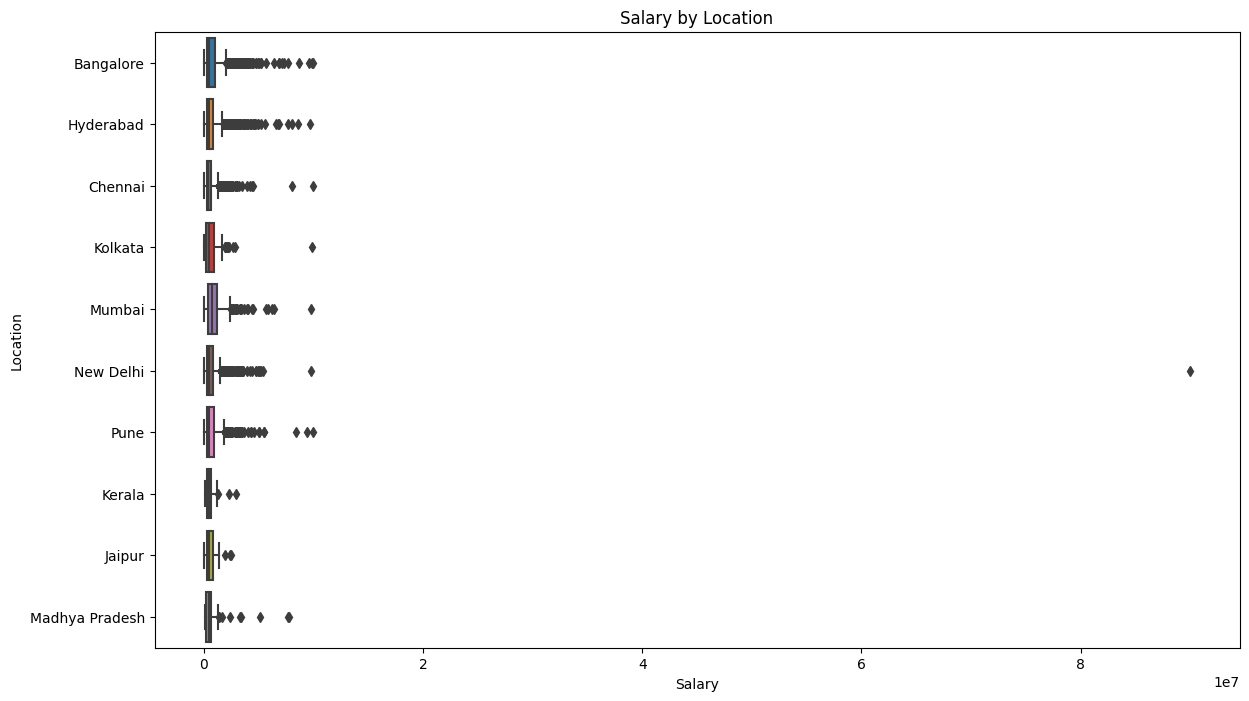

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Salary', y='Location', data=salaries_df)
plt.title('Salary by Location')
plt.xlabel('Salary')
plt.ylabel('Location')
plt.show()


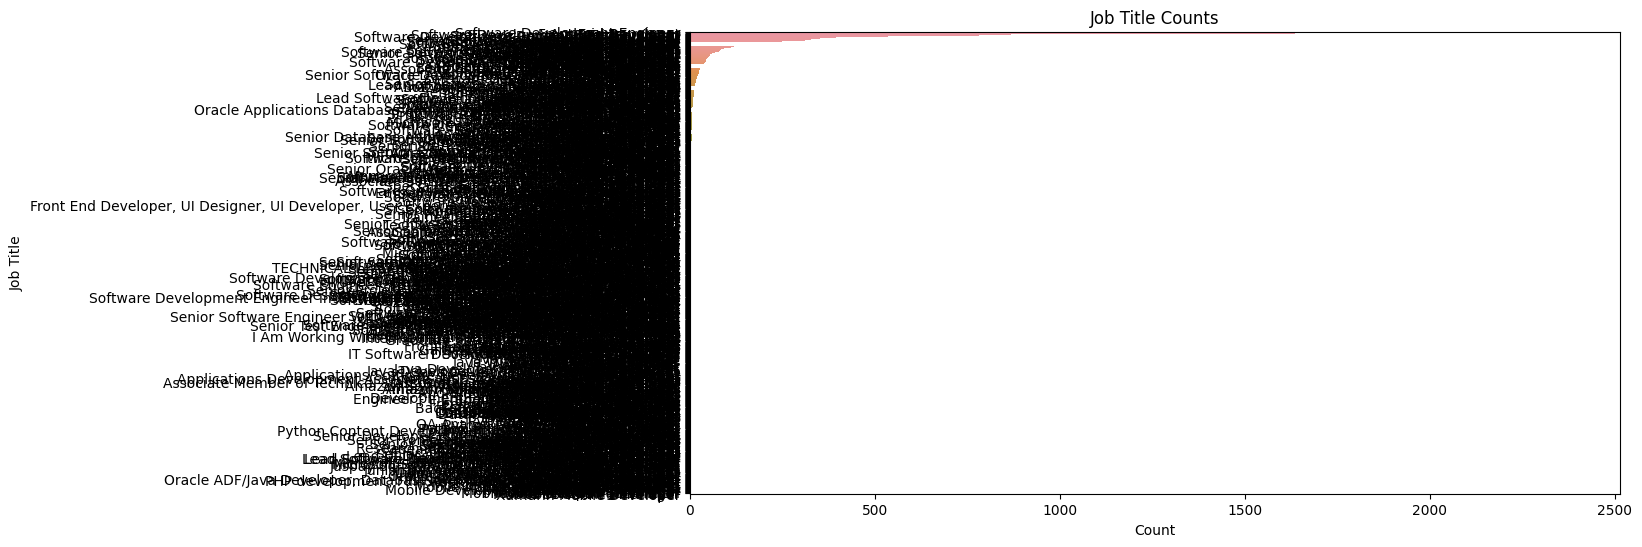

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot for Job Titles
plt.figure(figsize=(12, 6))
sns.countplot(y='Job Title', data=salaries_df, order=salaries_df['Job Title'].value_counts().index)
plt.title('Job Title Counts')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


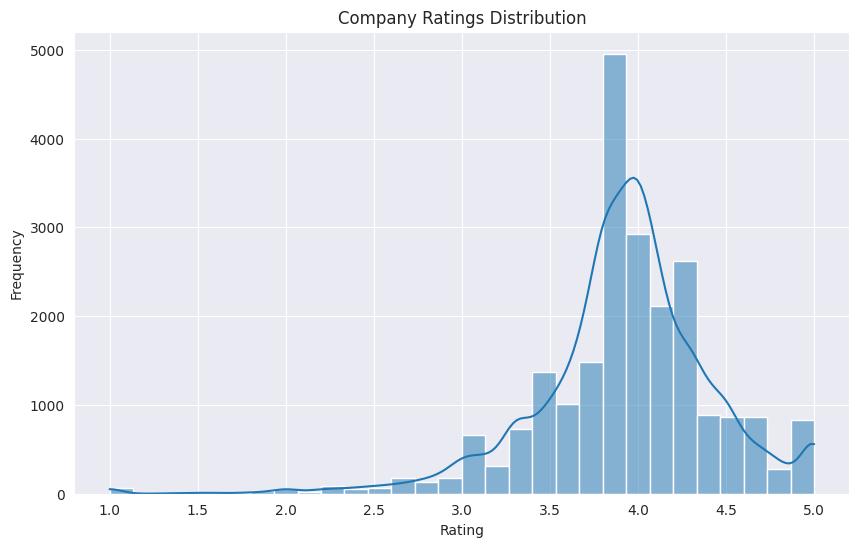

In [ ]:
# 3. Company Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title('Company Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



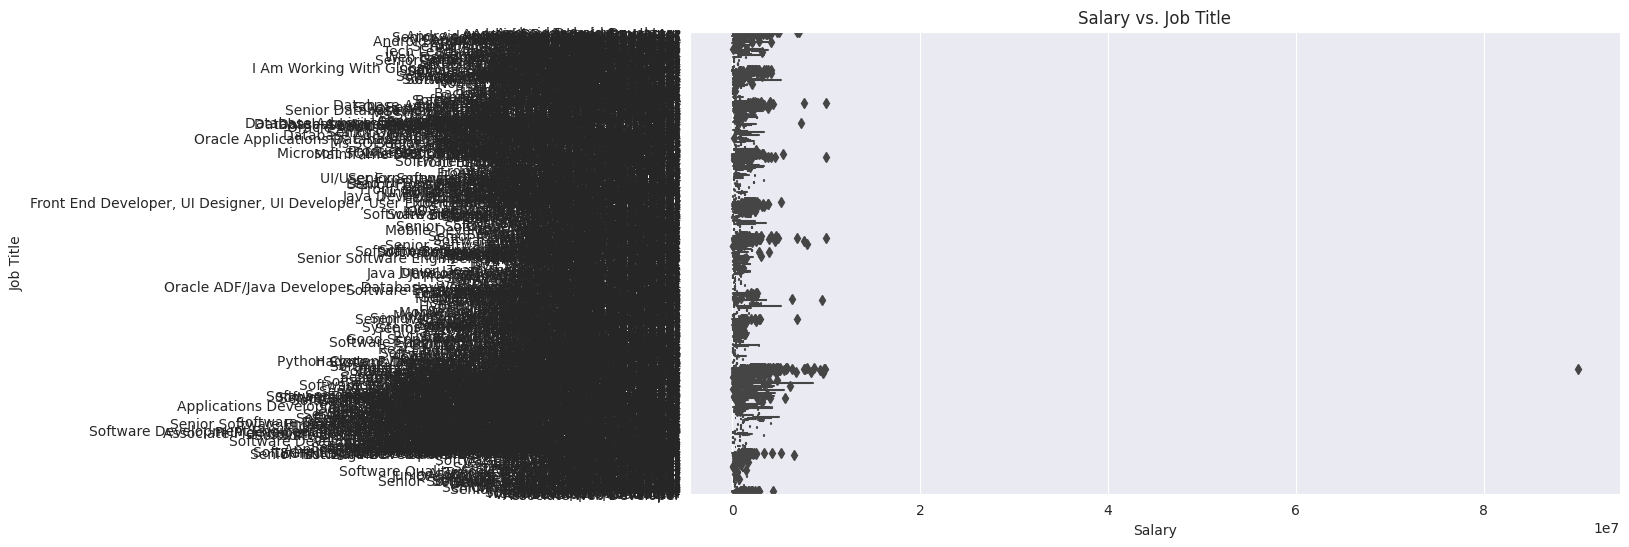

In [ ]:
# 4. Salary vs. Job Title
plt.figure(figsize=(12, 6))
sns.boxplot(x='Salary', y='Job Title', data=df)
plt.title('Salary vs. Job Title')
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.show()



In [ ]:
# 5. Salary by Location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Salary', y='Location', data=df)
plt.title('Salary by Location')
plt.xlabel('Salary')
plt.ylabel('Location')
plt.show()


NameError: ignored

<Figure size 1400x800 with 0 Axes>

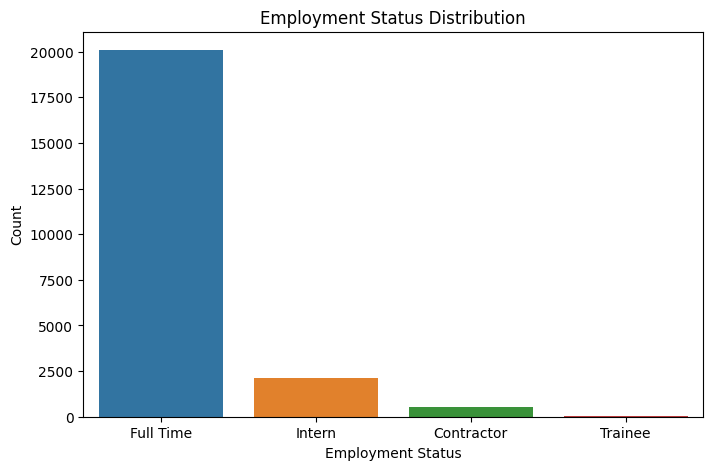

In [ ]:
# 6. Employment Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Employment Status', data=df)
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

In [ ]:
#removing rows containing null values
salaries_df = salaries_df.dropna(axis = 0)
#checking for null values
salaries_df.isnull().sum()


Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

Text(0.5, 1.0, 'Location vs Number Of Salaries Reported')

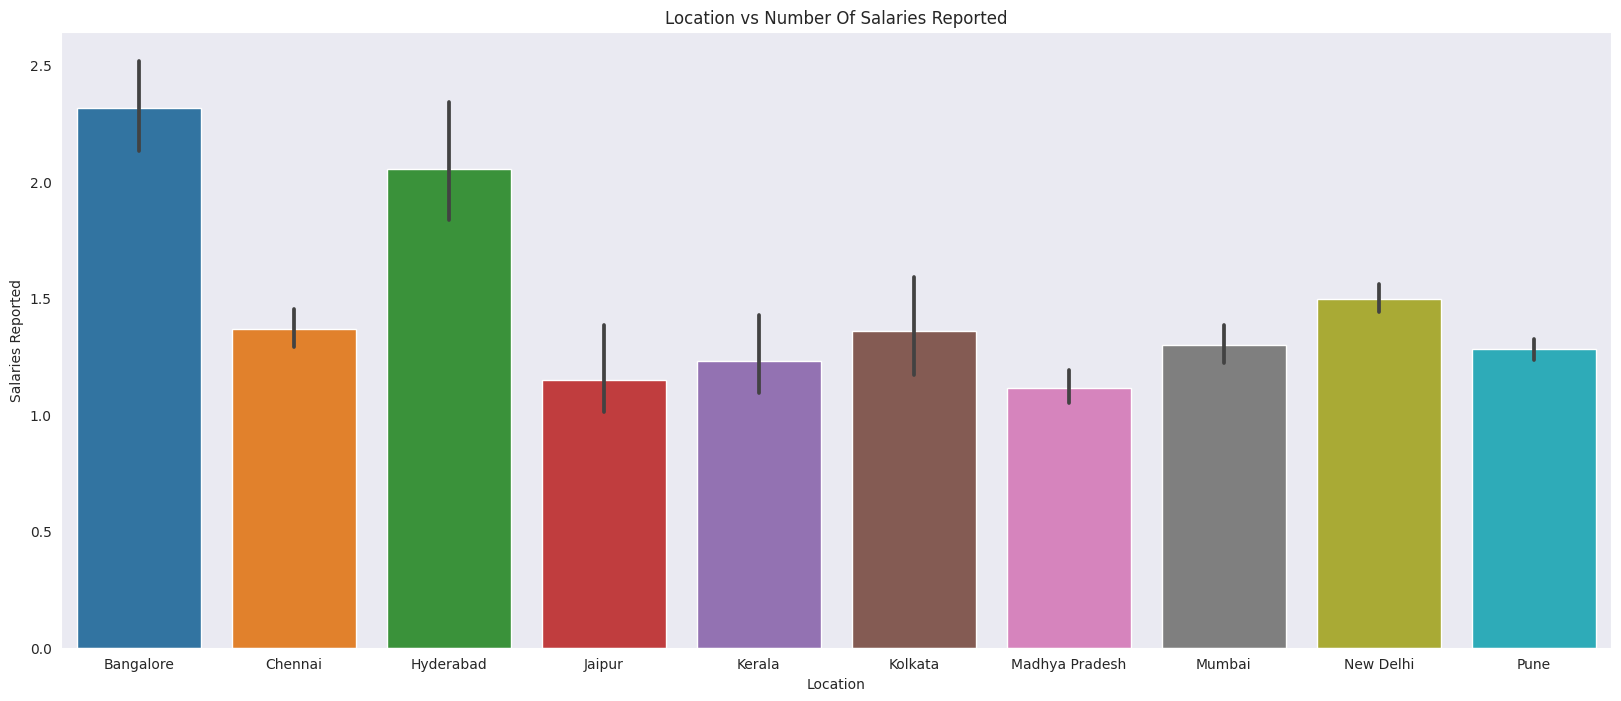

In [ ]:
#bar plot for location vs number of salaries reported\
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.barplot(x = salaries_df['Location'], y = salaries_df['Salaries Reported'])
plt.title("Location vs Number Of Salaries Reported")

Text(0.5, 1.0, 'Salary vs Location')

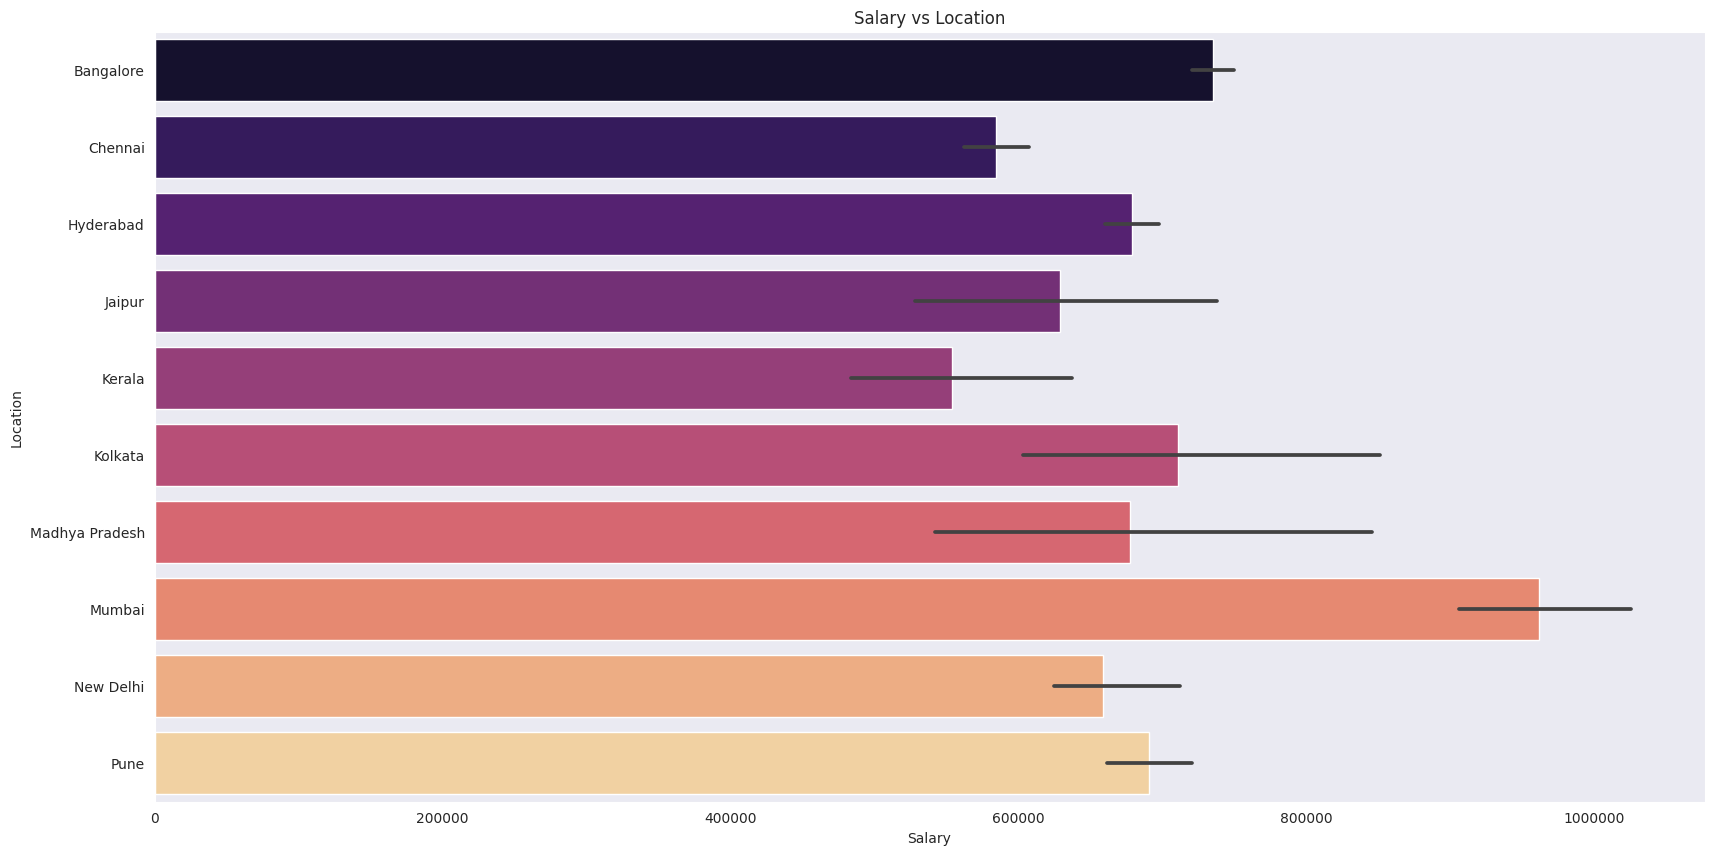

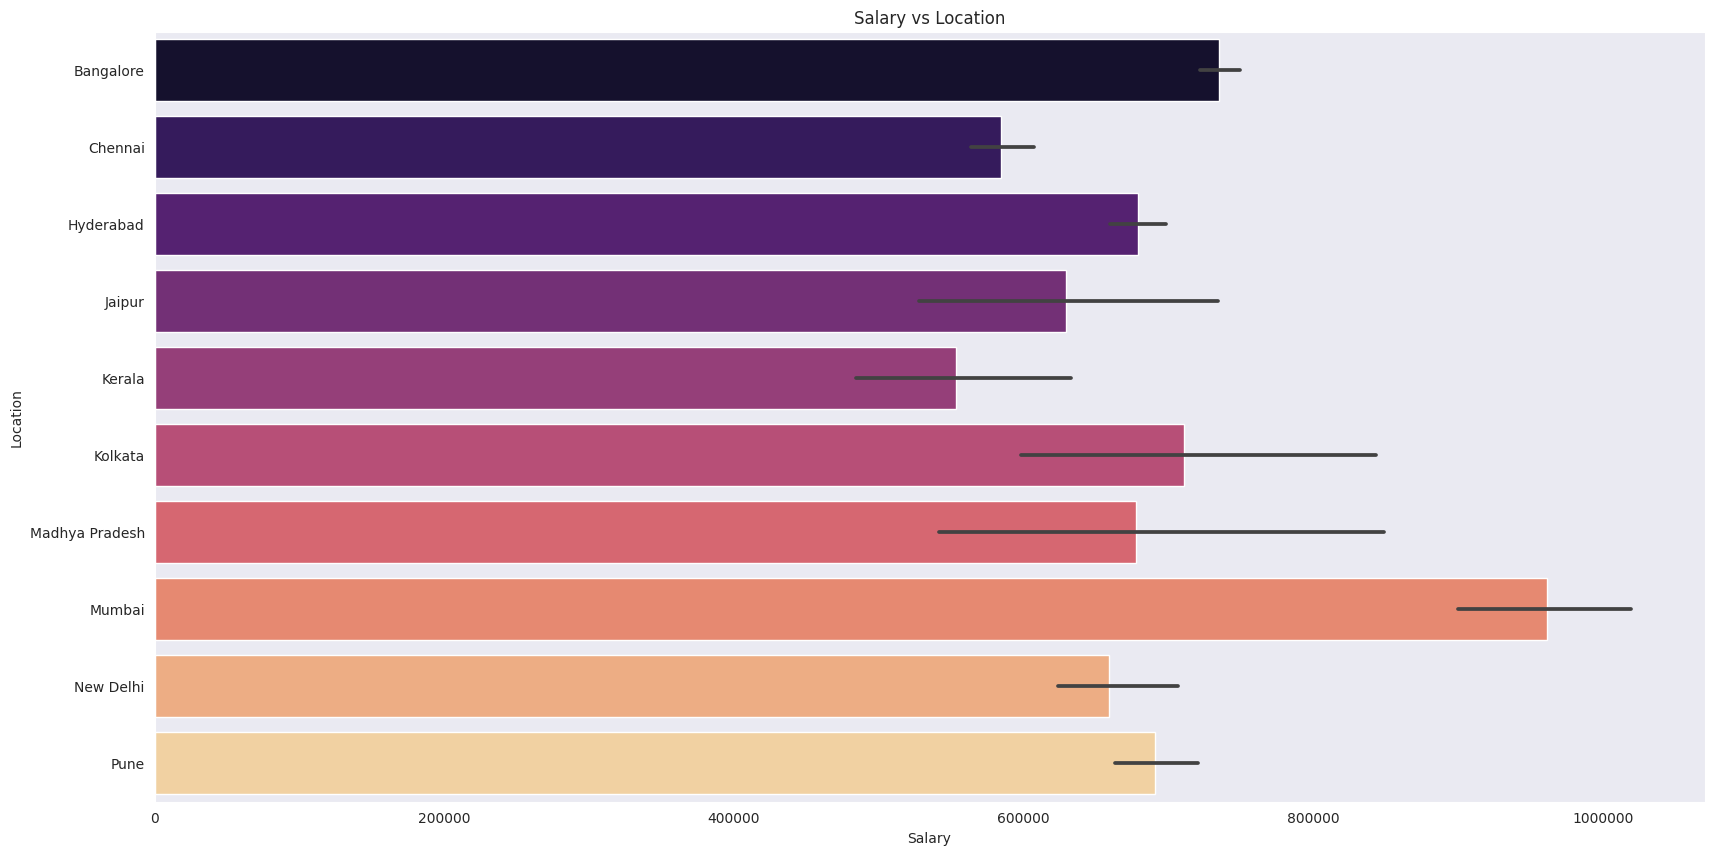

In [ ]:
#bar plot for salary vs location
plt.figure(figsize=(20,10))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = salaries_df['Salary'], y = salaries_df['Location'], palette = 'magma')
plt.title("Salary vs Location")#bar plot for salary vs location
plt.figure(figsize=(20,10))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = salaries_df['Salary'], y = salaries_df['Location'], palette = 'magma')
plt.title("Salary vs Location")

<Axes: xlabel='Company Name', ylabel='Salary'>

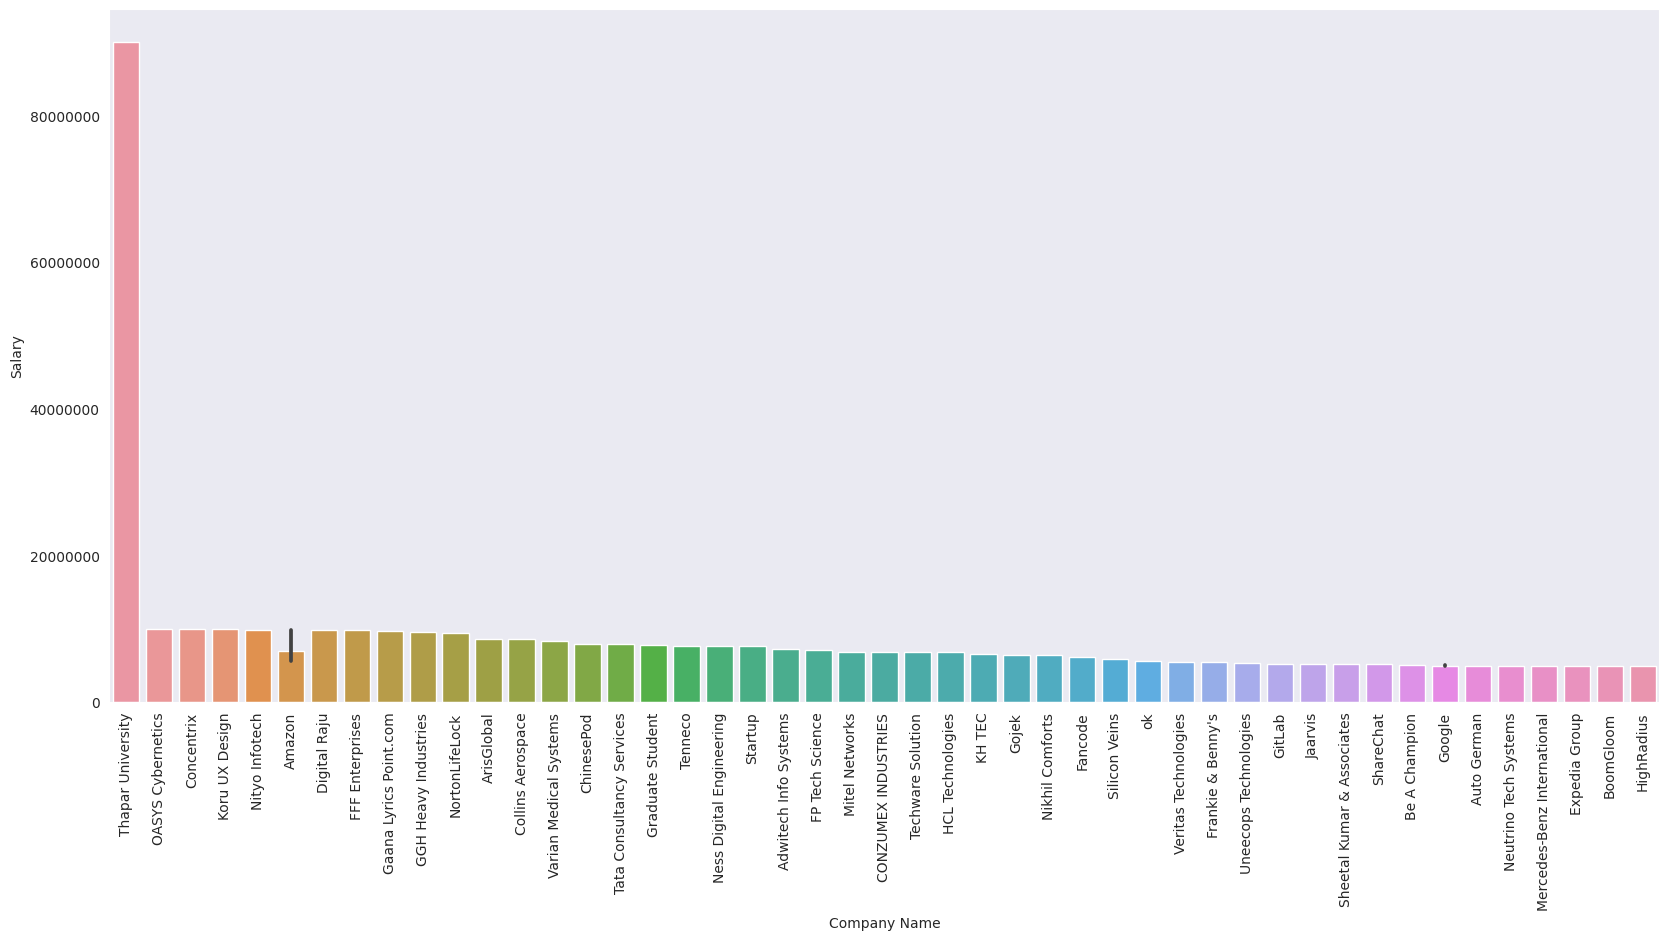

In [ ]:
#bar plot for company vs salary
plt.figure(figsize=(20,9))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
sns.set_style("whitegrid")
salaries_df.sort_values('Salary', axis = 0, ascending = False, inplace = True)
sns.barplot(y = salaries_df['Salary'][:50], x = salaries_df['Company Name'][:50])

(-1.2132961100320896,
 1.407613752400801,
 -1.2031973743100053,
 1.1049096370060467)

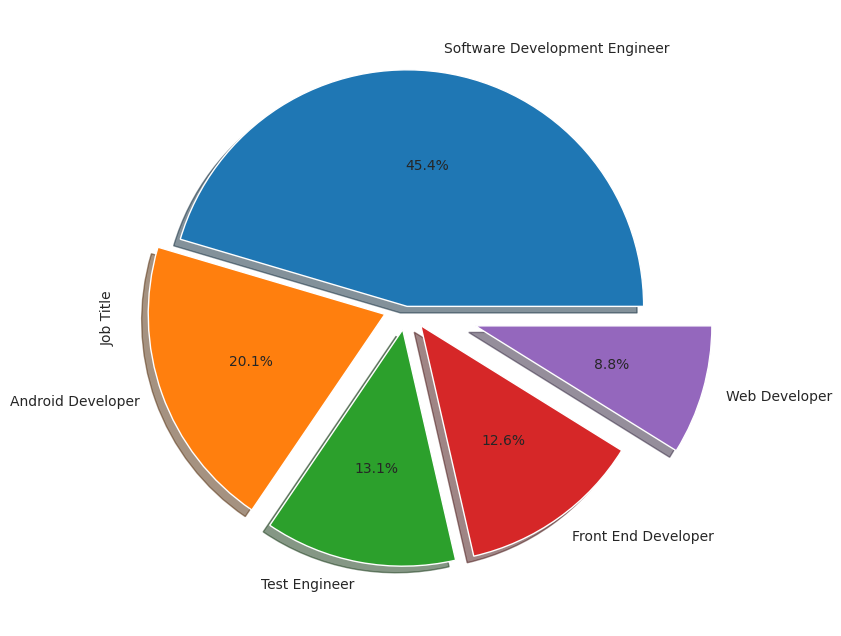

In [ ]:
#pie chart find top reported jobs
explode = (0, 0.1, 0.1, 0.1, 0.3)
salaries_df['Job Title'].value_counts()[:5].plot.pie(figsize = (8, 8),explode = explode, autopct = '%1.1f%%', shadow = True)
plt.axis('equal')

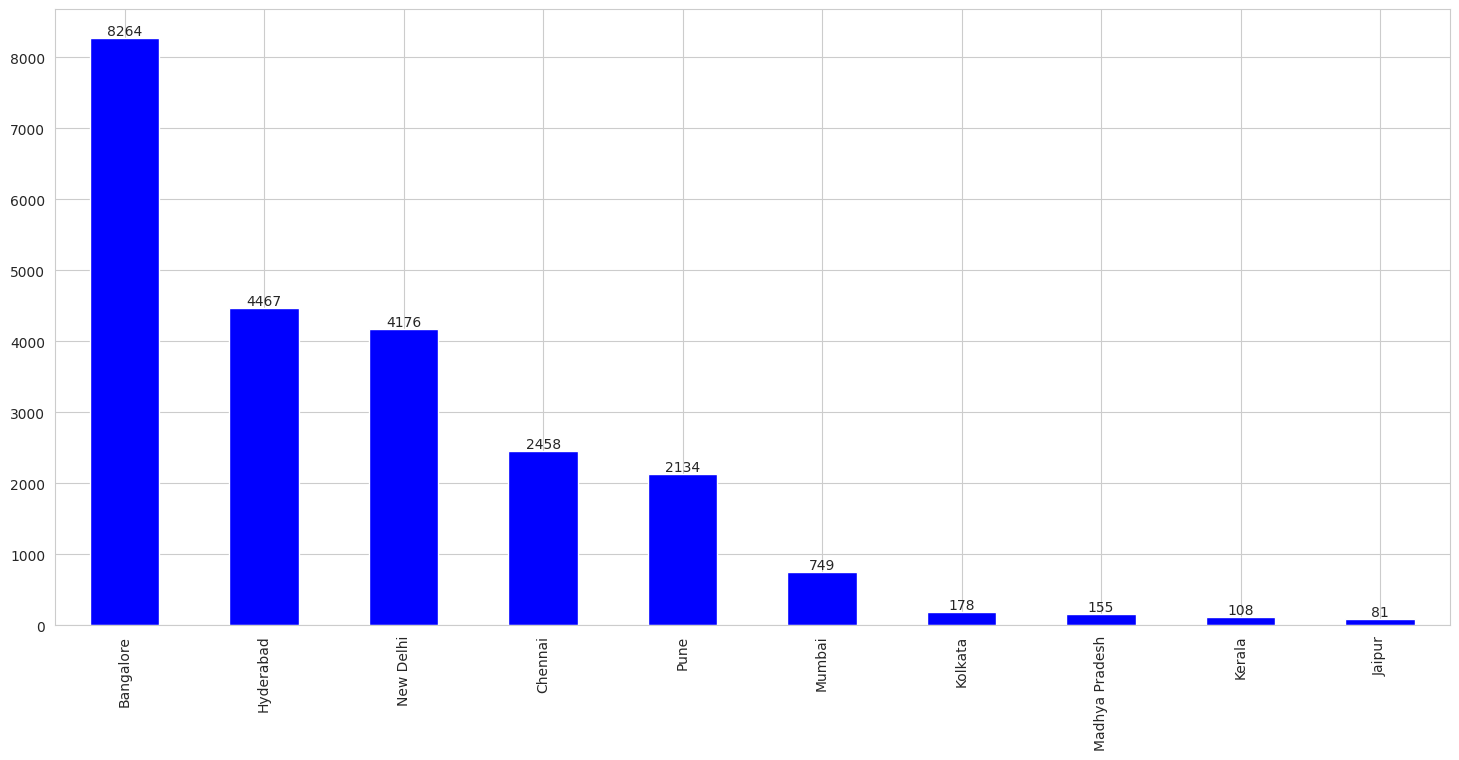

In [ ]:
#bar plot number of jobs in a particular location
plt.figure(figsize = (18,8))
bx = salaries_df.Location.value_counts().plot(kind = 'bar', color = 'blue')
for i in bx.containers:
    bx.bar_label(i,)

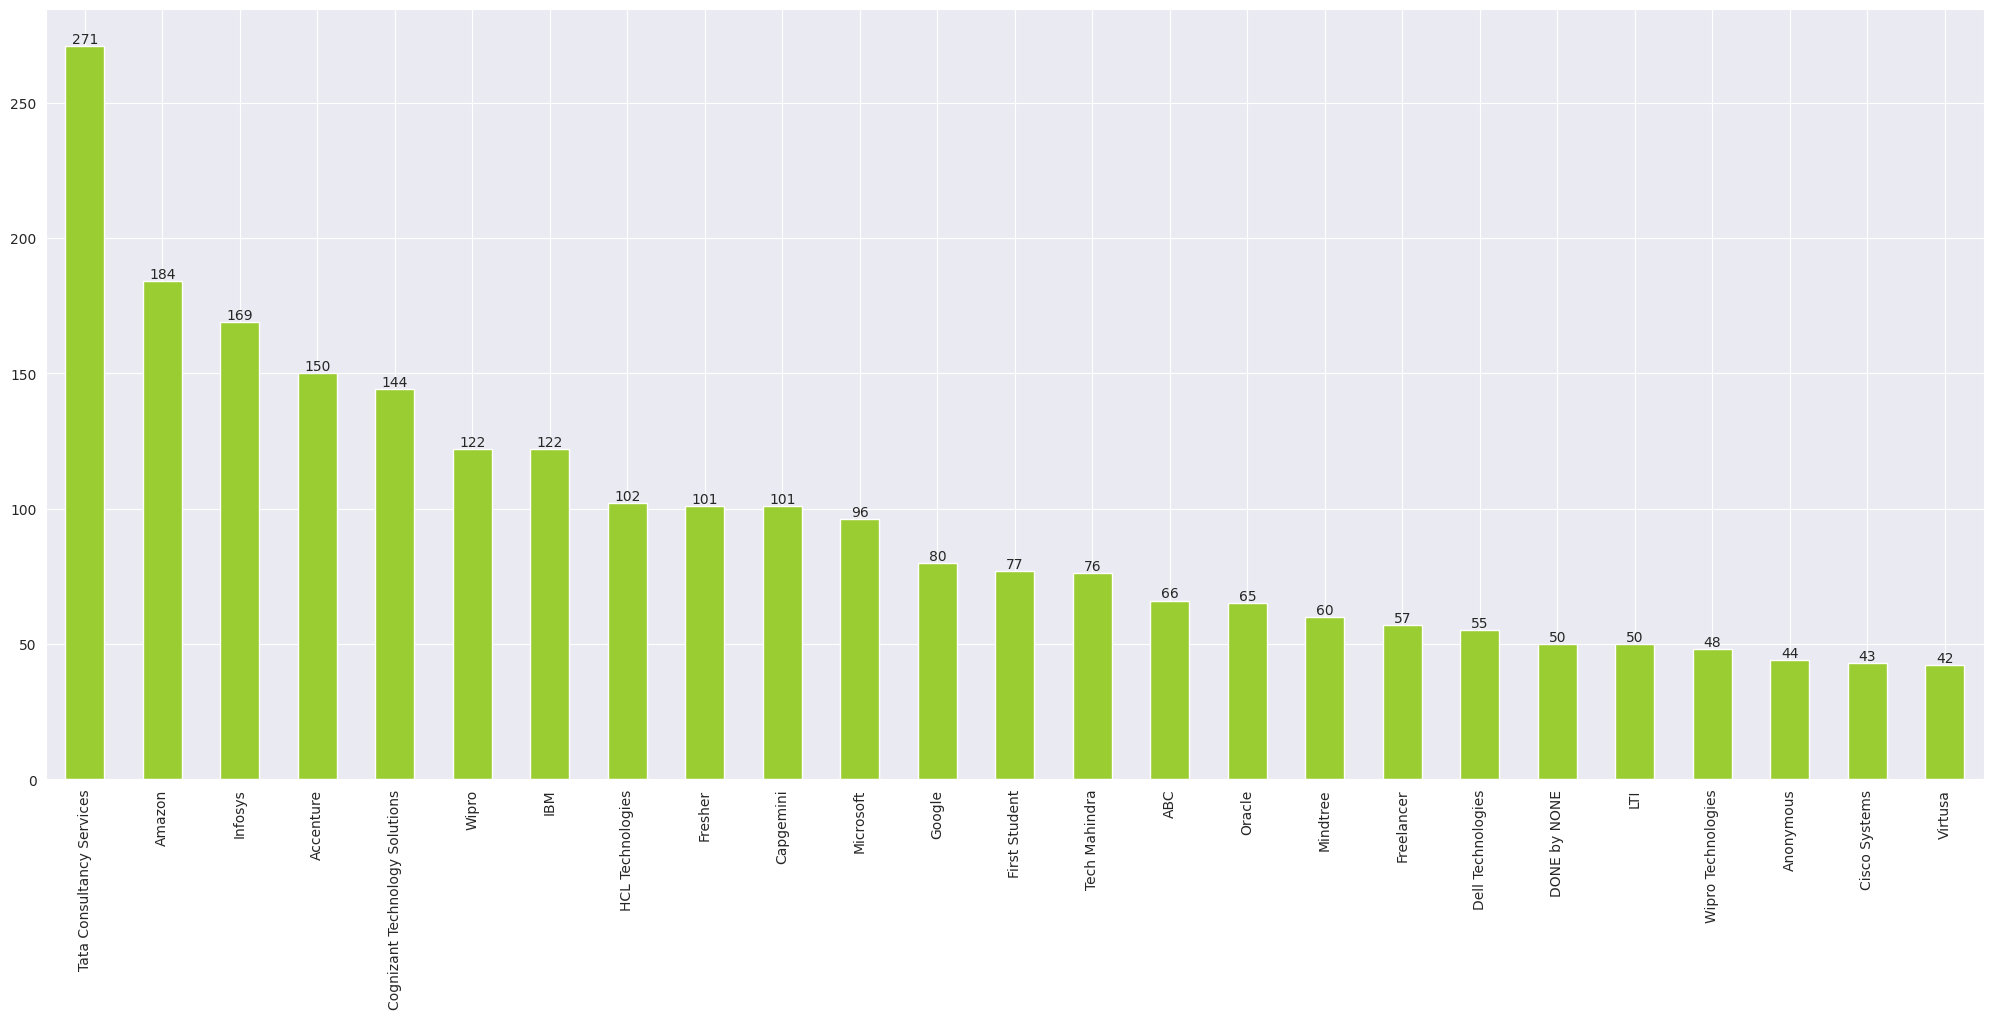

In [ ]:
#Top 25 Companies that are reported in the dataset
plt.figure(figsize = (25,10))
sns.set_style("darkgrid")
cx = salaries_df['Company Name'].value_counts()[:25].plot(kind = 'bar', color = 'yellowgreen')
for i in cx.containers:
    cx.bar_label(i,)

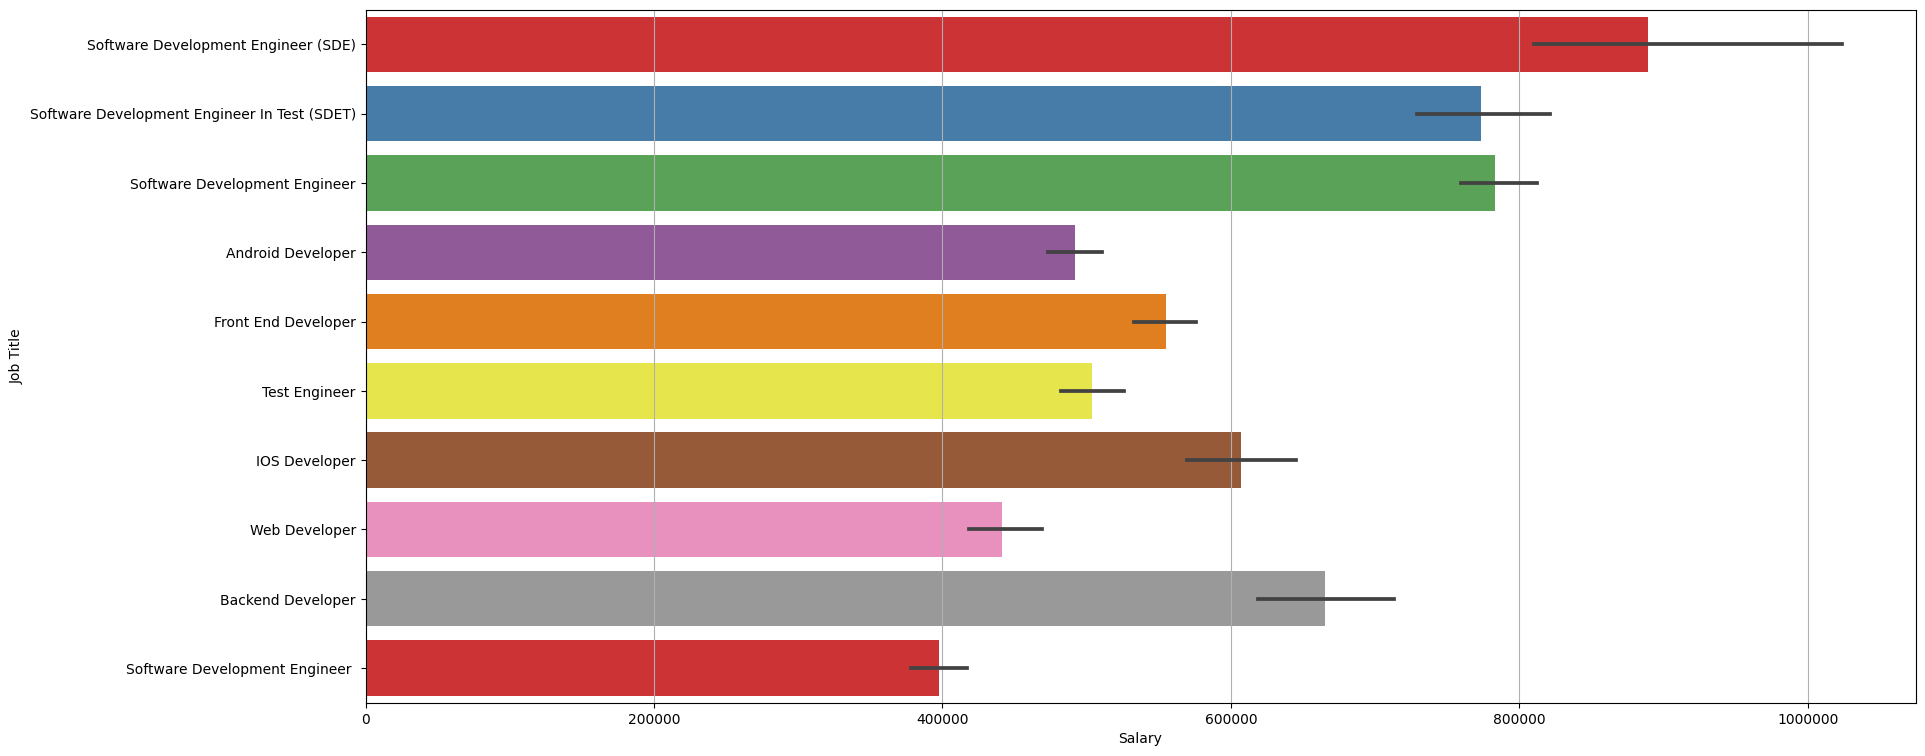

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a sample of job titles (e.g., the top 10)
sample_job_titles = salaries_df['Job Title'].value_counts().head(10).index

# Filter the DataFrame to include only the selected job titles
filtered_df = salaries_df[salaries_df['Job Title'].isin(sample_job_titles)]

# Sort the DataFrame by salary
filtered_df.sort_values('Salary', axis=0, ascending=False, inplace=True)

# Create the bar plot for salary vs. job title
plt.figure(figsize=(20, 9))
plt.grid()
plt.ticklabel_format(style='plain')
sns.barplot(x=filtered_df['Salary'], y=filtered_df['Job Title'], palette='Set1')

plt.show()


In [29]:
# Example feature engineering for average salary by job title
salaries_df['Avg Salary by Job Title'] = salaries_df.groupby('Job Title')['Salary'].transform('mean')
# Display a sample of the DataFrame with the 'Avg Salary by Job Title' column
print(salaries_df[['Job Title', 'Salary', 'Avg Salary by Job Title']])


                             Job Title   Salary  Avg Salary by Job Title
0                         "ORACLE DBA"   168000             2.840000e+05
1                         "ORACLE DBA"   400000             2.840000e+05
2               .NET Developer, Python   468000             4.680000e+05
3               .NET/Android Developer   100000             1.000000e+05
4              Ace - Android Developer  1000000             1.000000e+06
...                                ...      ...                      ...
22765                   Web Developer    288000             2.439221e+05
22766        Web Developer (Front-end)  1096128             1.096128e+06
22767  Web Developer, Python Developer   300000             3.000000e+05
22768  Web Developer/Android Developer   800000             8.000000e+05
22769         Xamarin Mobile Developer   900000             9.000000e+05

[22770 rows x 3 columns]


In [30]:


# Assuming 'Salaries Reported' column is present in your DataFrame
# Example: salaries_df[['Salaries Reported']]

# Define bins and labels for company size categories
bins = [1, 10, 15, float('inf')]
labels = ['Small', 'Medium', 'Large']

# Create the 'Company Size Category' feature using pd.cut()
salaries_df['Company Size Category'] = pd.cut(salaries_df['Salaries Reported'], bins=bins, labels=labels, right=False)

# Display the unique values in the 'Company Size Category' column
print(salaries_df['Company Size Category'].unique())

# Display a sample of the DataFrame with the 'Company Size Category' column
print(salaries_df[['Salaries Reported', 'Company Size Category']].head())


['Small', 'Large', 'Medium']
Categories (3, object): ['Small' < 'Medium' < 'Large']
   Salaries Reported Company Size Category
0                  1                 Small
1                  1                 Small
2                  1                 Small
3                  1                 Small
4                  1                 Small


In [ ]:
# Calculate the salary deviation from the average
salaries_df['Salary Deviation'] = salaries_df['Salary'] - salaries_df['Avg Salary by Job Title']

# Display a sample of the DataFrame with the 'Salary Deviation' column
print(salaries_df[['Job Title', 'Salary', 'Avg Salary by Job Title', 'Salary Deviation']].head())

           Job Title   Salary  Avg Salary by Job Title  Salary Deviation
0  Android Developer   400000            508105.857072    -108105.857072
1  Android Developer   400000            508105.857072    -108105.857072
2  Android Developer  1000000            508105.857072     491894.142928
3  Android Developer   300000            508105.857072    -208105.857072
4  Android Developer   600000            508105.857072      91894.142928


In [ ]:
import pandas as pd

# Assuming 'Location', 'Salary', and 'City Type' columns are present in your DataFrame
# Example: salaries_df[['Location', 'Salary', 'City Type']]

# Convert 'Salary' column to numeric (in case it's not already)
salaries_df['Salary'] = pd.to_numeric(salaries_df['Salary'], errors='coerce')

# Calculate the average salary for each city
average_salary_by_city = salaries_df.groupby('Location')['Salary'].mean()

# Map the average salary to the original DataFrame based on unique city names
salaries_df['Average Salary'] = salaries_df['Location'].map(average_salary_by_city)

# Define city types based on average salary
city_type_mapping = {}
for city, avg_salary in average_salary_by_city.items():
    if avg_salary > 900000:
        city_type_mapping[city] = 'High Cost'
    elif avg_salary > 600000:
        city_type_mapping[city] = 'Medium Cost'
    else:
        city_type_mapping[city] = 'Low Cost'

# Map the 'Location' column to create the 'City Type' feature
salaries_df['City Type'] = salaries_df['Location'].map(city_type_mapping)

# Display all unique cities and their corresponding city types
print("All Unique Cities and Their City Types:")
print(salaries_df[['Location', 'Average Salary','City Type']].drop_duplicates(subset=['Location']))




All Unique Cities and Their City Types:
             Location  Average Salary    City Type
0           Bangalore   735344.739593  Medium Cost
8264          Chennai   584559.661513     Low Cost
10722            Pune   690476.311153  Medium Cost
10723       Hyderabad   679099.157376  Medium Cost
15190          Jaipur   629135.802469  Medium Cost
15271          Kerala   553577.481481     Low Cost
15379         Kolkata   710925.573034  Medium Cost
15557  Madhya Pradesh   677641.909677  Medium Cost
15712          Mumbai   961180.368491    High Cost
16461       New Delhi   658756.735632  Medium Cost


In [34]:

## Assuming 'Company Name', 'Rating', and 'Experience Level' columns are present in your DataFrame
# Example: salaries_df[['Company Name', 'Rating', 'Experience Level']]

# Define bins and labels for experience levels based on ratings
rating_bins = [0, 2, 3, 4, 5]
rating_labels = ['Beginner', 'Intermediate', 'Experienced', 'Expert']

# Create the 'Experience Level' feature using pd.cut()
salaries_df['Experience Level'] = pd.cut(salaries_df['Rating'], bins=rating_bins, labels=rating_labels, right=False)

# Display a sample of the DataFrame with the 'Company Name', 'Rating', and 'Experience Level' columns
print(salaries_df[['Company Name', 'Rating', 'Experience Level']].sample(50))


                           Company Name  Rating Experience Level
21497                            Aptean     3.5      Experienced
8533          Danlaw Technologies India     3.3      Experienced
15582              Tachyon Technologies     4.7           Expert
5749      Piccosoft Software Labs India     4.6           Expert
14676                           Postman     4.5           Expert
19114                   Tally Solutions     4.3           Expert
2991                            Provana     3.6      Experienced
3154                    Kshan Tech Soft     4.2           Expert
1767               Colevit Technologies     4.5           Expert
8597   App Developers India IT Services     4.0           Expert
22321                         MMAD Apps     2.9     Intermediate
15513                         Microsoft     4.4           Expert
4270                            Unifize     4.7           Expert
4751      Adwaitham Global IT Solutions     4.3           Expert
7086                   Sa

In [ ]:

# Assuming 'Job Title' and 'Job Title Length' columns are present in your DataFrame
# Example: salaries_df[['Job Title', 'Job Title Length']]

# Create the 'Job Title Length' feature based on the number of words
salaries_df['Job Title Length'] = salaries_df['Job Title'].apply(lambda x: len(x.split()))

# Display a sample of the DataFrame with the 'Job Title' and 'Job Title Length' columns
print(salaries_df[['Job Title', 'Job Title Length']].sample(30))


                                          Job Title  Job Title Length
9527                          Junior Java Developer                 3
10003            Systems Developer/Python Developer                 3
18635                          Senior IOS Developer                 3
17467                    Backend Developer - Intern                 4
1347                               Backend Engineer                 2
1596                         Database Administrator                 2
21585                          Senior IOS Developer                 3
17550                    Backend Developer - Intern                 4
2218             Lead Oracle Database Administrator                 4
705                        Senior Android Developer                 3
20651                             Android Developer                 2
14413                    Test Engineer - Contractor                 4
18848                            Lead IOS Developer                 3
19991  Software Deve

In [36]:
import pandas as pd

# Assuming 'Company Name', 'Location', and 'Location Diversity' columns are present in your DataFrame
# Example: salaries_df[['Company Name', 'Location', 'Location Diversity']]

# Create the 'Location Diversity' feature
salaries_df['Location Diversity'] = salaries_df.groupby('Company Name')['Location'].transform('nunique')

# Display a sample of the DataFrame with the 'Company Name', 'Location', and 'Location Diversity' columns
print(salaries_df[['Company Name', 'Location', 'Location Diversity']].sample(10))


                    Company Name   Location  Location Diversity
18656                   Mobikwik  New Delhi                   1
21360                     Fiserv  Hyderabad                   5
19093                     Amazon  Hyderabad                   9
9372   Tata Consultancy Services  Hyderabad                   9
773        GOFRUGAL Technologies    Chennai                   1
22503              K Venka Reddy  Bangalore                   1
12506         Robert Bosch India  Bangalore                   1
15757                      BTech  Hyderabad                   2
4263                     Amplifi  Bangalore                   1
3057                      ZinEdu  New Delhi                   1


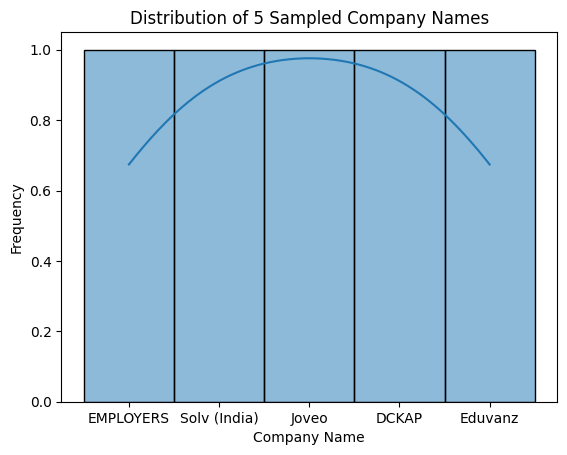

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'salaries_df' is your DataFrame and 'Company Name' is a column in it
sample_size = 5  # Adjust the sample size as needed
sampled_companies = salaries_df['Company Name'].sample(sample_size)

# Create the histogram for the sampled company names
sns.histplot(sampled_companies, bins=30, kde=True)
plt.title(f'Distribution of {sample_size} Sampled Company Names')
plt.xlabel('Company Name')
plt.ylabel('Frequency')
plt.show()




In [43]:

# Assuming 'Job Title', 'Salary', and 'Normalized Salary' columns are present in your DataFrame
# Example: salaries_df[['Job Title', 'Salary', 'Normalized Salary']]

# Create the 'Normalized Salary' feature by dividing each salary by the maximum salary within its job title group
salaries_df['Normalized Salary'] = salaries_df['Salary'] / salaries_df.groupby('Job Title')['Salary'].transform('max')

# Display a sample of the DataFrame with the 'Job Title', 'Salary', and 'Normalized Salary' columns
print(salaries_df[['Job Title', 'Salary', 'Normalized Salary']].sample(5))


                                Job Title   Salary  Normalized Salary
5150                  Front End Developer   300000           0.055556
20087  Systems Developer/Python Developer   168000           0.120000
10950               Senior Java Developer   200000           0.020000
65                  Android App Developer   228000           0.114000
12118       Software Development Engineer  1200000           0.137931


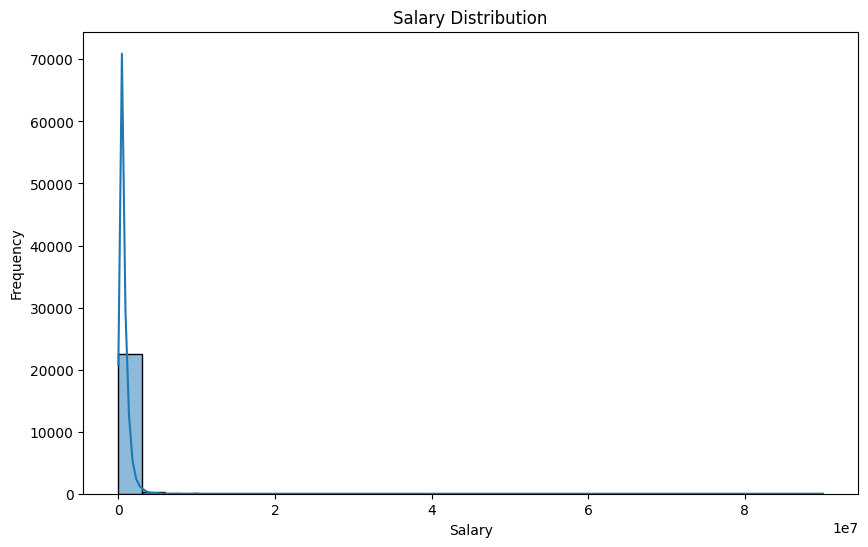

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(salaries_df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


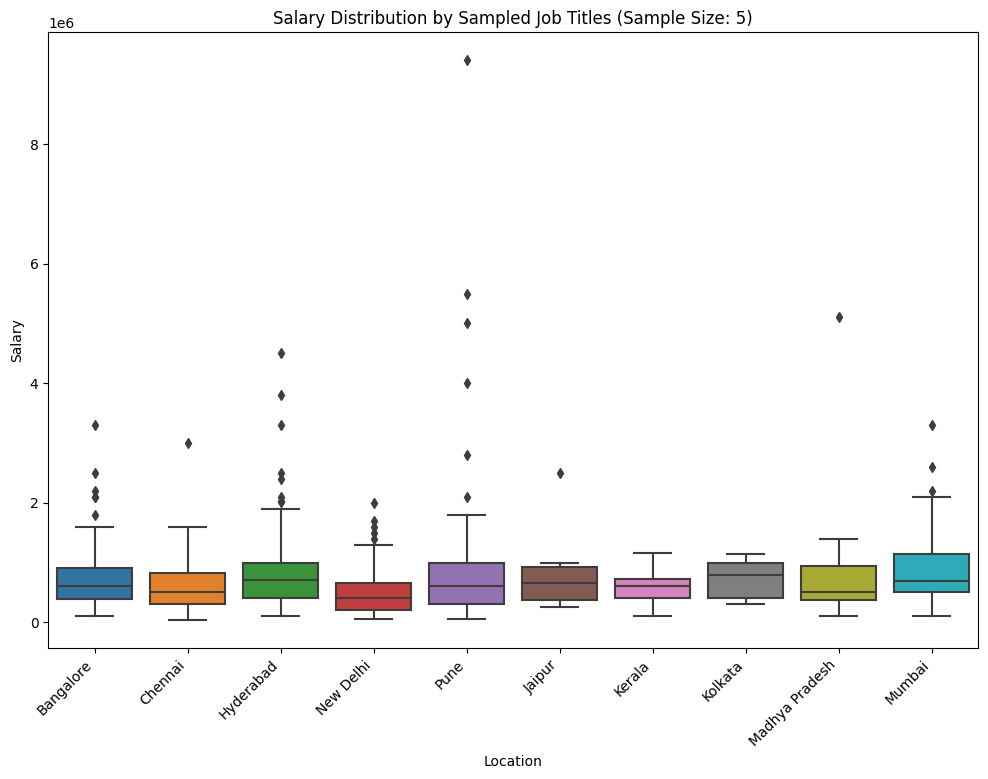

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'salaries_df' is your DataFrame
sample_size = 5  # Adjust the sample size as needed

# Sample job titles
sampled_job_titles = salaries_df['Job Title'].sample(sample_size)

# Filter the DataFrame to include only the sampled job titles
filtered_df = salaries_df[salaries_df['Job Title'].isin(sampled_job_titles)]

# Create the box plot for salary distribution by job title
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='Salary', data=filtered_df)
plt.title(f'Salary Distribution by Sampled Job Titles (Sample Size: {sample_size})')
plt.xticks(rotation=45, ha='right')
plt.show()


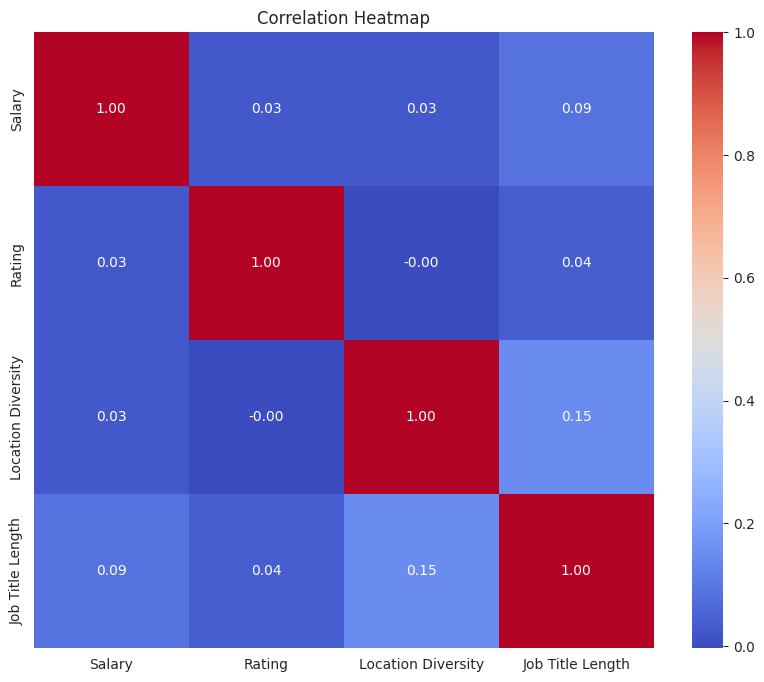

In [ ]:
# Correlation heatmap
correlation_matrix = salaries_df[['Salary', 'Rating', 'Location Diversity', 'Job Title Length']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


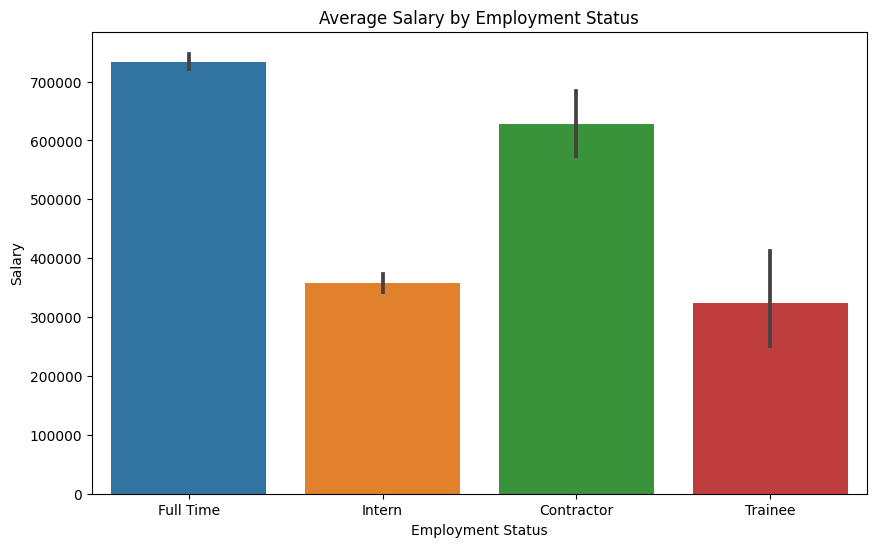

In [49]:
# Bar chart of average salary by employment status
plt.figure(figsize=(10, 6))
sns.barplot(x='Employment Status', y='Salary', data=salaries_df)
plt.title('Average Salary by Employment Status')
plt.show()


In [86]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your feature columns and 'y' contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
# Assuming 'Rating', 'Location Diversity', 'Job Title Length' are features in your dataset
# and 'Salary' is the target variable you want to predict

# Features (X)
X = salaries_df[['Rating', 'Salary']]

# Target variable (y)
y = salaries_df['Salary']
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [94]:
from sklearn.preprocessing import OneHotEncoder

# Assuming X_train and X_test are your feature sets
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform the categorical columns in X_train
X_train_encoded = encoder.fit_transform(X_train[['Job Title']])

# Transform the categorical columns in X_test
X_test_encoded = encoder.transform(X_test[['Job Title']])

# Drop the original categorical column and concatenate the encoded columns
X_train = pd.concat([X_train.drop(['Job Title'], axis=1), pd.DataFrame(X_train_encoded)], axis=1)
X_test = pd.concat([X_test.drop(['Job Title'], axis=1), pd.DataFrame(X_test_encoded)], axis=1)








In [89]:
from sklearn.svm import SVR
model = SVR()


In [91]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2649772652653.6846


In [ ]:
# Example: Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


